In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [38]:
microbes = pd.read_csv('./data/rel_microbes.from_biom.tsv', sep='\t', index_col=0)
metabolites = pd.read_csv('./data/rel_metabolites.from_biom.tsv', sep='\t', index_col=0)

In [39]:
# take small subset of microbes and metabolites
microbes = microbes.iloc[[0, 100]]
metabolites = metabolites.iloc[[0, 100, 200, 300, 400]]

<Axes: ylabel='Frequency'>

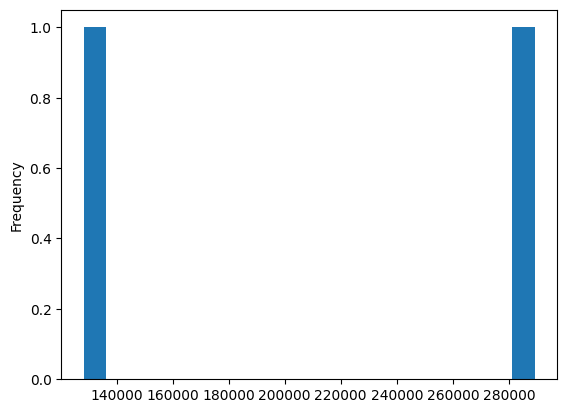

In [33]:
microbes.sum(axis=1).plot.hist(bins=20)

In [18]:
plt.show()

In [15]:
plt.savefig('./figures/microbe_dist.png')

<Figure size 640x480 with 0 Axes>

In [40]:
print(f"Microbe shape: {microbes.shape}")
print(f"Metabolite shape: {metabolites.shape}")

Microbe shape: (2, 1260)
Metabolite shape: (5, 1260)


In [41]:
microbes.to_csv('./data/microbes_normalized.tsv', sep='\t', index=True)
metabolites.to_csv('./data/metabolites_normalized.tsv', sep='\t', index=True)

In [42]:
! python ../../src/correlation_test.py

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 85.55it/s]
pvalues mean: 0.5837407854902444, pvalues std: 0.2366254367542727


In [20]:
! python ../../src/DML.py

100%|█████████████████████████████████████████████| 5/5 [00:50<00:00, 10.05s/it]
pvalues mean: 0.12369975236931638, pvalues std: 0.233261691620734


In [48]:
for microbe in microbes.index:
    for metabolite in metabolites.index:
        rho, p_value = stats.spearmanr(microbes.loc[microbe], metabolites.loc[metabolite])
        print(microbe, metabolite, f"rho: {rho}")


theta_p_0 P_0 rho: -0.013276641819274564
theta_p_0 SA_0 rho: -0.017022363523223026
theta_p_0 F_0 rho: 0.012703947803325018
theta_p_0 SG_0 rho: -0.0020827098334936555
theta_p_0 I_0 rho: 0.02396867467450798
theta_f_0 P_0 rho: 0.03435549577620519
theta_f_0 SA_0 rho: -0.001775183831414621
theta_f_0 F_0 rho: 0.02136970661353285
theta_f_0 SG_0 rho: -0.00926187250461525
theta_f_0 I_0 rho: 0.029162898491679714


In [17]:
# print([(i, j) for j in range(10) for i in range(10)])

In [25]:
! python ../../src/DML_parallel.py

1.8539
0.001
